In [33]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import os
import numpy as np

## read dataset function

In [12]:
def load_flle(filename):
    x = []
    with open(filename) as f:
        line = f.readline()
        line = line.strip('\n')
    return line

def dirlist(path, files):
    filelist = os.listdir(path)

    for filename in filelist:
        filepath = os.path.join(path, filename)
        if os.path.isdir(filepath):
            dirlist(filepath, files)
        else:
            files.append(filepath)
    return files

def load_train_files(path):
    x = []
    y = []
    list = os.listdir(path)
    for i in range(0, len(list)):
        path2 = os.path.join(path, list[i])
        if os.path.isfile(path2):
            x.append(load_flle(path2))
            y.append(0)
    return x, y


def load_attack_files(path, x, y, attack_type):
    total = 0
    for i in range(1,11):
        files = dirlist(path + attack_type +"_" + str(i), [])
        total = total + len(files)
        for file in files:
            x.append(load_flle(file))
            y.append(1)
    print(attack_type + " data: " + str(total))
    return x, y


## read attack data

In [13]:
attack_type = ['Adduser', 'Hydra_FTP', 'Hydra_SSH', 'Java_Meterpreter', 'Meterpreter', 'Web_Shell']
xa = []
ya = []
for attack in attack_type:
    xa, ya = load_attack_files("ADFA-LD/Attack_Data_Master/", xa, ya, attack)
xt, yt = load_train_files("ADFA-LD/Training_Data_Master/")  
xv, yv = load_train_files("ADFA-LD/Validation_Data_Master/")  
x_trn = xt + xa
y_trn = yt + ya
x_val = xv 
y_val = yv 


Adduser data:91
Hydra_FTP data:162
Hydra_SSH data:176
Java_Meterpreter data:124
Meterpreter data:75
Web_Shell data:118


## Parameter

In [63]:
n = 2
left = 0
right = 10

### Normal

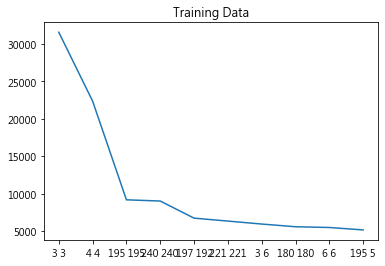

('3 3', '4 4', '195 195', '240 240', '197 192', '221 221', '3 6', '180 180', '6 6', '195 5')
(31531, 22334, 9163, 8999, 6716, 6325, 5928, 5569, 5468, 5145)


In [68]:
dic_normal = defaultdict(lambda: 0)
for d in xt:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_normal[index] = dic_normal[index] + 1

lists = sorted(dic_normal.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Training Data")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### adduser

Adduser data:91


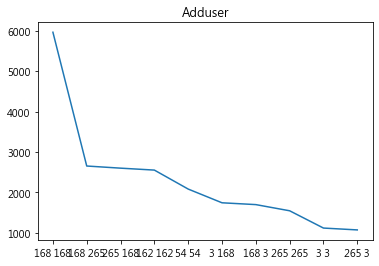

('168 168', '168 265', '265 168', '162 162', '54 54', '3 168', '168 3', '265 265', '3 3', '265 3')
(5964, 2650, 2597, 2549, 2079, 1739, 1694, 1541, 1113, 1067)


In [59]:
dic_addusr = defaultdict(lambda: 0)
x_addusr = []
y_addusr = []
x_addusr, y_addusr = load_attack_files("ADFA-LD/Attack_Data_Master/", x_addusr, y_addusr, 'Adduser')
for d in x_addusr:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_addusr[index] = dic_addusr[index] + 1

lists = sorted(dic_addusr.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Adduser")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Hydra FTP

Hydra_FTP data:162


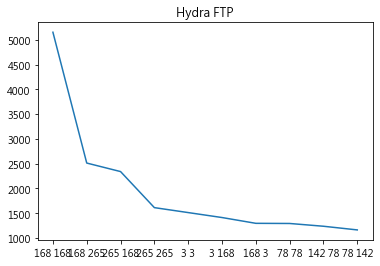

('168 168', '168 265', '265 168', '265 265', '3 3', '3 168', '168 3', '78 78', '142 78', '78 142')
(5153, 2512, 2340, 1612, 1512, 1412, 1295, 1292, 1236, 1162)


In [60]:
dic_ftp = defaultdict(lambda: 0)
x_ftp = []
y_ftp = []
x_ftp, y_ftp = load_attack_files("ADFA-LD/Attack_Data_Master/", x_ftp, y_ftp, 'Hydra_FTP')
for d in x_ftp:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_ftp[index] = dic_ftp[index] + 1

lists = sorted(dic_ftp.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Hydra FTP")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Hydra SSH

Hydra_SSH data:176


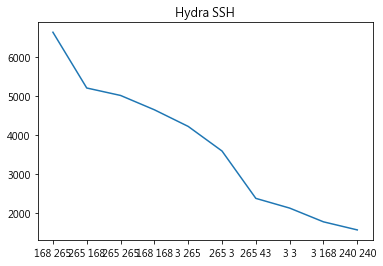

('168 265', '265 168', '265 265', '168 168', '3 265', '265 3', '265 43', '3 3', '3 168', '240 240')
(6628, 5200, 5009, 4642, 4216, 3586, 2373, 2124, 1772, 1565)


In [62]:
dic_ssh = defaultdict(lambda: 0)
x_ssh = []
y_ssh = []
x_ssh, y_ssh = load_attack_files("ADFA-LD/Attack_Data_Master/", x_ssh, y_ssh, 'Hydra_SSH')
n = 2
for d in x_ssh:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_ssh[index] = dic_ssh[index] + 1

lists = sorted(dic_ssh.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Hydra SSH")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Java Meterpreter

Java_Meterpreter data:124


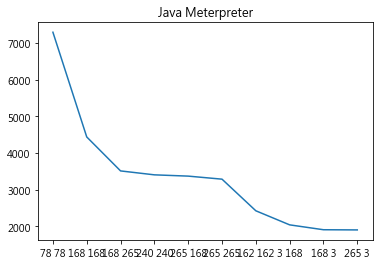

('78 78', '168 168', '168 265', '240 240', '265 168', '265 265', '162 162', '3 168', '168 3', '265 3')
(7296, 4439, 3512, 3405, 3370, 3287, 2424, 2040, 1907, 1902)


In [65]:
dic_java = defaultdict(lambda: 0)
x_java = []
y_java = []
x_java, y_java = load_attack_files("ADFA-LD/Attack_Data_Master/", x_java, y_java, 'Java_Meterpreter')
n = 2
for d in x_java:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i + n])
        dic_java[index] = dic_java[index] + 1

lists = sorted(dic_java.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Java Meterpreter")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Meterpreter

Meterpreter data:75


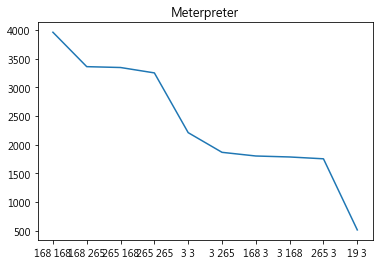

('168 168', '168 265', '265 168', '265 265', '3 3', '3 265', '168 3', '3 168', '265 3', '19 3')
(3960, 3360, 3345, 3251, 2209, 1866, 1802, 1785, 1753, 513)


In [67]:
dic_met = defaultdict(lambda: 0)
x_met = []
y_met = []
x_met, y_met = load_attack_files("ADFA-LD/Attack_Data_Master/", x_met, y_met, 'Meterpreter')
for d in x_met:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_met[index] = dic_met[index] + 1

lists = sorted(dic_met.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Meterpreter")
plt.plot(px, py)
plt.show()
print(px)
print(py)


### Web Shell

Web_Shell data:118


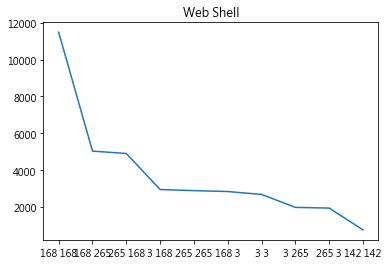

('168 168', '168 265', '265 168', '3 168', '265 265', '168 3', '3 3', '3 265', '265 3', '142 142')
(11483, 5038, 4909, 2955, 2895, 2846, 2689, 1986, 1948, 764)


In [66]:
dic_web = defaultdict(lambda: 0)
x_web = []
y_web = []
x_web, y_web = load_attack_files("ADFA-LD/Attack_Data_Master/", x_web, y_web, 'Web_Shell')
for d in x_web:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_web[index] = dic_web[index] + 1

lists = sorted(dic_web.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Web Shell")
plt.plot(px, py)
plt.show()
print(px)
print(py)